<a href="https://colab.research.google.com/github/jrogerio92/Agent-Based-Modeling-and-Simulation-of-Mosquitoes/blob/master/Modelagem_Mosquitos_Aedes_Aegypti_e_variante_Trangenico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mundo**

Unidade de Tempo da Simulação: Hora

Unidade de Espaço da Simulação: Metro

**Ciclo de Vida:**

Tempo a ser estudado 60 Dias = 1440 Horas

Mosquito Pronto: 10 Dias = 240  Horas

Liberação dos mosquitos Trangenicos 17 dias (408 Horas) apos o inicia da simulação

Qtde Maxima de Reproduçoões da Femea: 3. Dfinida para um intervalo de 240 Horas

Tempo de Vida Total do Mosquito: Menos de 30 Dias. 


In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import math

def rng():
  np.random.seed(1337)

# Parametros
nMachos = 50
nFemeas = 50
# Insira Abaixo Quantos mosquitos Trangenicos Serão inseridos na Simulação
nMachosTran = 25

#Tempo de Simulação
sim_time = 1440
# sim_time = 1440 #Padrão


# Regras
minTimeToBreed = 240 # Horas
readyAge = 240 # Horas
maxAge = 720 # Horas
minEggs = 5
maxEggs = 15
worldSize = 150 # Metros

**Classes Mosquitos**

---


In [0]:
class Mosquito:
    def __init__(self, sex, category, age=0):
      self.px = np.random.randint(worldSize)
      self.py = np.random.randint(worldSize)
      self.age = age
      self.direction = np.random.randint(360)
      self.sex = sex
      self.category = category
 
    def flyRandomly(self):
      if (self.age > readyAge):
        self.px += math.ceil(5*np.sin(np.radians(self.direction)))
        self.py += math.ceil(5*np.cos(np.radians(self.direction)))
        # Colisão com a Parede do mundo
        if(self.px<0 or self.px > worldSize or self.py <0 or self.py > worldSize):
            self.direction = (self.direction+180)%360

    def setAge(self, age):
      self.age = age

    def increaseAge(self, x=1):
      self.age += x

    def death(self, mosquitoes=[]):
      pass
      mosquitoes.remove(self)

    def checkDeathAge(self):
      if((self.age * np.random.uniform(0.5,1.5)) > maxAge):
        return True
      else:
        return False  

class FemaleMosquito(Mosquito):
  def __init__(self, sex, category, age=0, readyToBreedDelay=0):
    super(FemaleMosquito, self).__init__(sex,category,age)
    self.readyToBreedDelay = readyToBreedDelay

  # Verifica a Colisão das Femas com os Machos
  def checkColision(self, mosquito):
    # print('Checando colisao de', self.sex, self.category, 'Com', mosquito.sex, mosquito.category)
    if (self.px == mosquito.px and self.py == mosquito.py): 
      return True
    else:
      return False

  def increaseReadyToBreedDelay(self):
    self.readyToBreedDelay += 1

  def breeding(self, mosquitoes, mosquito_M):
    if (self.age > readyAge and 
        self.readyToBreedDelay >= minTimeToBreed and 
        mosquito_M.age > readyAge):
      self.readyToBreedDelay = 0
      if (mosquito_M.category == 'N'):
        nBreeding = np.random.randint(minEggs,maxEggs)
        for x in range(nBreeding):
          if np.random.randint(2) == 0:
            mosquitoes.append(Mosquito('M','N'))
          else:
            mosquitoes.append(FemaleMosquito('F','N'))

**Inicialização dos Vetores**

---

In [0]:
# Inicializando Lista de Mosquitos
mosquitoes = []

# Femeas Normais
nF = nFemeas

# Machos Normais
nM = nMachos

# Machos Trangenicos
nM_tran = nMachosTran

# Machos Normais
for x in range(nM):
      mosquitoes.append(Mosquito('M','N',))

# Femeas
for x in range(nF):
      mosquitoes.append(FemaleMosquito('F', 'N'))


In [0]:
#for i in range(len(mosquitoes)):
#   pprint(vars(mosquitoes[i]))

**Definição da Simulação**

---



In [0]:
historico = np.zeros((sim_time))
ntFemale = np.zeros((sim_time))
ntMale = np.zeros((sim_time))
ntMaleTran = np.zeros((sim_time))

def Playsimulation(simtime):
  for t in range (simtime):
    historico[t] = len(mosquitoes)
    ntFemale[t] = 0
    ntMale[t] = 0
    ntMaleTran[t] = 0

    if (t == 408):
      # Liberando Machos Trangenicos
      for x in range(nM_tran):
        mosquitoes.append(Mosquito('M','T', readyAge))

    # if (t % 20 == 0): 
    #   pass
    #   # print('time: ', t)
    #   # print('list: ', len(mosquitoes))
    #   # print('----------------------')

    # Checar idade dos mosquitos
    for _Mosquito in mosquitoes:
      _Mosquito.increaseAge()
      if(_Mosquito.checkDeathAge()):
        # print('Death: ', _Mosquito.age)
        _Mosquito.death(mosquitoes)
      else:
        if (_Mosquito.sex == 'F'): _Mosquito.increaseReadyToBreedDelay()
        _Mosquito.flyRandomly()

    # Checagens gerais dos mosquitos
    for Mosquito_A in mosquitoes:
      # Adição de Mosquitos para contabilização no historico
      if (Mosquito_A.sex == 'F'): ntFemale[t] += 1
      if (Mosquito_A.sex == 'M' and Mosquito_A.category == 'N'): ntMale[t] += 1
      if (Mosquito_A.sex == 'M' and Mosquito_A.category == 'T'): ntMaleTran[t] += 1

      for Mosquito_B in mosquitoes:
        if (Mosquito_A.sex == 'F' and Mosquito_B.sex == 'M'):
          if (Mosquito_A.checkColision(Mosquito_B)):
            Mosquito_A.breeding(mosquitoes, Mosquito_B)

**Executar Simulação**


Média:  51.30277777777778
Médiana:  34.0
Desvio Padrão:  53.57834339705587


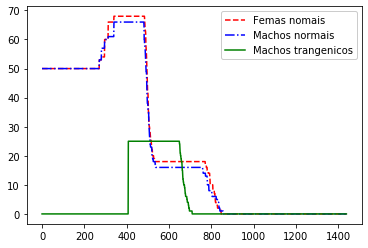

In [20]:
Playsimulation(sim_time)
print('Média: ',np.mean(historico))
print('Médiana: ',np.median(historico))
print('Desvio Padrão: ',np.std(historico))

# plt.plot(historico)
plt.plot(ntFemale, '--r', label='Femas nomais')
plt.plot(ntMale, '-.b', label='Machos normais')
plt.plot(ntMaleTran, '-g', label='Machos trangenicos')
plt.legend(framealpha=1, frameon=True);
# plt.rcParams["figure.figsize"] = (1,2)
plt.show()


# # for t in range(simtime):
# #     femaleMosquitoes[0].flyRandomly()
# #     for xx,mosquito in enumerate(femaleMosquitoes):
# #         trajetoria[xx,t,0] = mosquito.px
# #         trajetoria[xx,t,1] = mosquito.py